# Multiplexed window problem

Attempts are performed in batches. The process ends when the total number of successful attempts in the last $w$ batches is larger or equal to $n$.
We want to compute the average number of batches until $n$ successes, $\mathbb{E}[B]$, and the second moment, $\mathbb{E}[B^2]$.

Parameters:
 - $n$: total number of successes required.
 - $k$: number of attempts per batch.
 - $p$: probability of successful attempt.
 - $w$: window size (in number of batches).

Random variables:
 - $B$: number of batches until success.

In this notebook, we validate our simulations and analytical solutions of the (multiplexed) window problem. We also analyze the squared coefficient of variation of the window problem, a quantity that is needed to find the mean sojourn time in QCS.

In [1]:
import numpy as np
import math
import importlib as imp
import QCSsimulator as sim
import random
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

# Infinite window ($w\rightarrow\infty$)

We want to compute the average number of batches until $n$ successes, $\mathbb{E}[B]$, and the second moment, $\mathbb{E}[B^2]$.

---

### --- $k=1$ ---


When $k=1$ (i.e., maximum one success per batch), the number of batches until achieving $n$ successes follows a negative binomial distribution. In this case, we have an exact formula for the first two moments of $B$. This is also discussed in Davies2023.

Below, we compare the result that we intuitively expect, with the result from the negative binomial distribution, and the general result (discussed in the next section).

Expected number of batches:
---Analytical: 10.001
---Numerical: 10.001
Expected squared number of batches:
---Analytical: 100.021
---Numerical: 100.021


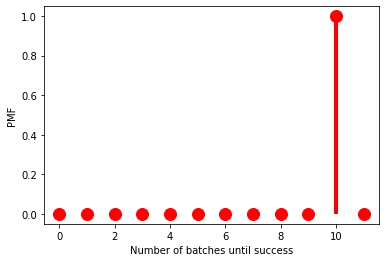

Expected result vs Negative binomial vs General window problem
Average number of rounds: 10.00 vs 10.00 vs 10.00
Variance number of rounds: 0.00 vs 0.00 vs 0.00


In [3]:
# k=1, p=1

imp.reload(sim)

n = 10 
k = 1
window_size = np.inf
p = 0.9999

# Negative binomial
avg, avg2 = sim.solve_multiplexed_window_problem(n, k, window_size, p,
                                                 validate_moments=True, plot_distribution=True)

# Closed-form from the window problem
avg_general, avg2_general = sim.solve_multiplexed_window_problem(n, k, window_size, p,
                                             validate_moments=False, plot_distribution=False)

print('Expected result vs Negative binomial vs General solution')
print('Average number of rounds: %.2f vs %.2f vs %.2f'%(n,avg,avg_general))
print('Variance number of rounds: %.2f vs %.2f vs %.2f'%(0,avg2-avg**2,avg2_general-avg_general**2))

Expected number of batches:
---Analytical: 7.143
---Numerical: 7.143
Expected squared number of batches:
---Analytical: 54.079
---Numerical: 54.079


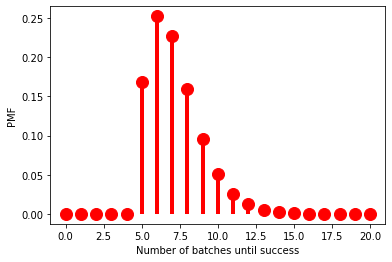

Expected result vs Negative binomial vs General solution
Average number of rounds: 7.14 vs 7.14 vs 7.14
Variance number of rounds: 3.06 vs 3.06 vs 3.06


In [7]:
# k=1, any p

imp.reload(sim)

n = 5
k = 1
window_size = np.inf
p = 0.7

# Negative binomial
avg, avg2 = sim.solve_multiplexed_window_problem(n, k, window_size, p,
                                                 validate_moments=True, plot_distribution=True)

# Closed-form from the window problem
avg_general, avg2_general = sim.solve_multiplexed_window_problem(n, k, window_size, p,
                                             validate_moments=False, plot_distribution=False)

print('Expected result vs Negative binomial vs General solution')
print('Average number of rounds: %.2f vs %.2f vs %.2f'%(n/p,avg,avg_general))
print('Variance number of rounds: %.2f vs %.2f vs %.2f'%(n*(1-p)/p**2 + avg**2 - (n/p)**2,
                                                       avg2-avg**2,avg2_general-avg_general**2))

---

### --- $k > 1$ ---


We computed the solution of the multiplexed (infinite) window problem in general form (any $n$, $k$, and $p$). In particular, we found an analytical expression for the probability distribution of $B$, which involves nested sums over all possible success patters. Computing the result of these sums is computationally expensive so we cannot analyze any combination of parameters (larger $n$ and smaller $k$ are more expensive).

Expected number of batches:
---Analytical: 3.000
---Numerical: 3.000
Expected squared number of batches:
---Analytical: 9.000
---Numerical: 9.000


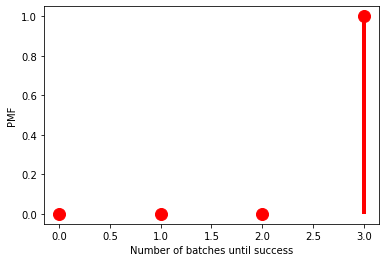

Expected vs General solution
Average number of rounds: 3.00 vs 3.00
Variance number of rounds: 0.00 vs -0.00


In [9]:
# p=1

imp.reload(sim)

n = 9
k = 4
window_size = np.inf
p = 0.9999

avg, avg2 = sim.solve_multiplexed_window_problem(n, k, window_size, p,
                                                 validate_moments=True, plot_distribution=True)
print('Expected vs General solution')
print('Average number of rounds: %.2f vs %.2f'%(np.ceil(n/k),avg))
print('Variance number of rounds: %.2f vs %.2f'%(0,avg2-avg**2))

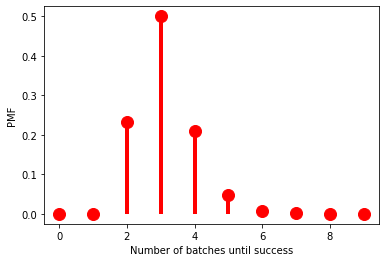

Expected vs General solution
Average number of rounds: >=2.00 vs 3.10
Variance number of rounds: - vs 0.72


In [10]:
# p<1

imp.reload(sim)

n = 5
k = 3
window_size = np.inf
p = 0.6

avg, avg2 = sim.solve_multiplexed_window_problem(n, k, window_size, p,
                                                 validate_moments=False, plot_distribution=True)
print('Expected vs General solution')
print('Average number of rounds: >=%.2f vs %.2f'%(np.ceil(n/k),avg))
print('Variance number of rounds: - vs %.2f'%(avg2-avg**2))

---
---
---
# Finite window: MonteCarlo simulation

Here we use a MonteCarlo simulation to find an approximate solution to the window problem. We do this for two reasons:
 1. Infinite window: as discussed above, calculating the probability distribution of $B$ in the multiplexed problem is computationally expensive. Hence, to explore the whole parameter space we would need a cheaper analytical solution (which may not exist) or a simulation.
 2. Finite window: we did not solve the problem analytically for a finite window size. However, in Davies2023, they solved it for $k=1$. Their analytical solution is computationally expensive and cannot be evaluated for any combinations of parameters (large $w$, large $n$, and small $p$ make it more expensive). Therefore, we do not expect the existence of an analytical solution for the multiplexed case ($k>1$) that is cheaper to evaluate. Hence, even if we found a general solution, we would also expect the need for simulations to explore the whole parameter space.

Parameters:
 - $n$: total number of successes required.
 - $k$: number of attempts per batch.
 - $p$: probability of successful attempt.
 - $w$: window size.

Random variables:
 - $B$: number of batches until success.

We want to compute the average number of batches until $n$ successes, $\mathbb{E}[B]$, and the second moment, $\mathbb{E}[B^2]$.

---

### Large window ($w \gg n/p$)

For a very large window ($w \gg n/p$), we recover the analytical result for an infinite window:

In [75]:
imp.reload(sim)

# Parameters
n = 10
k = 1
w = 50
p = 0.9999

# Numerical parameters
N_samples = 100
randomseed = 2

### ---------- ###
### ---------- ###

# Theory (infinite window)
avg_theory, avg2_theory = sim.solve_multiplexed_window_problem(n, k, np.inf, p)

# MonteCarlo simulation
avg, std, stderr = sim.simulate_multiplexed_window_problem(n, k, w, p, N_samples, randomseed)

print('Theory vs simulation')
print('Average: %.2f vs %.2f(%.2f)'%(avg_theory, avg, 2*stderr))
print('Variance: %.2f vs %.2f'%(avg2_theory-avg_theory**2,std**2))

Theory vs simulation
Average: 10.00 vs 10.00(0.00)
Variance: 0.00 vs 0.00


In [85]:
imp.reload(sim)

# Parameters
n = 10 
k = 3
w = 500
p = 0.8

# Numerical parameters
N_samples = 1000
randomseed = 2

### ---------- ###
### ---------- ###

# Theory (infinite window)
avg_theory, avg2_theory = sim.solve_multiplexed_window_problem(n, k, np.inf, p)

# MonteCarlo simulation
avg, std, stderr = sim.simulate_multiplexed_window_problem(n, k, w, p, N_samples, randomseed)

print('Theory vs simulation')
print('Average: %.2f vs %.2f(%.2f)'%(avg_theory, avg, 2*stderr))
print('Variance: %.2f vs %.2f'%(avg2_theory-avg_theory**2,std**2))

Theory vs simulation
Average: 4.51 vs 4.51(0.04)
Variance: 0.39 vs 0.38


### Effect of the window

Calculating infinite window case (theory)...



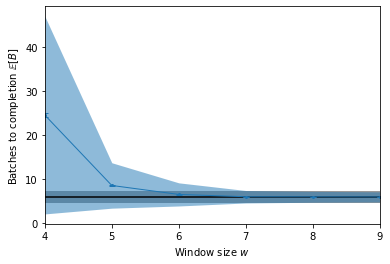

In [14]:
imp.reload(sim)

# Parameters
n = 10
k = 3
w_vec = np.arange(1,10,1)
p = 0.6

# Numerical parameters
N_samples = 3000
randomseed = 2

### ---------- ###
### ---------- ###

w_vec_plot = []
avg_vec = []
std_vec = []
stderr_vec = []
for w in w_vec:
    if w*k < n:
        continue
    avg, std, stderr = sim.simulate_multiplexed_window_problem(n, k, w, p, N_samples, randomseed)
    w_vec_plot += [w]
    avg_vec += [avg]
    std_vec += [std]
    stderr_vec += [stderr]
    
# Infinite window (theory)
print('Calculating infinite window case (theory)...')
avg_theory, avg2_theory = sim.solve_multiplexed_window_problem(n, k, np.inf, p)
std_theory = avg2_theory-avg_theory**2
print('\r')

avg_vec = np.array(avg_vec)
std_vec = np.array(std_vec)
avg_theory_vec = np.zeros(len(w_vec_plot))+avg_theory
std_theory_vec = np.zeros(len(w_vec_plot))+std_theory
color = 'tab:blue'

plt.fill_between(w_vec_plot, avg_theory_vec-std_theory_vec, avg_theory_vec+std_theory_vec,
                 color='k', alpha=0.4, linewidth=0)
plt.fill_between(w_vec_plot, avg_vec-std_vec, avg_vec+std_vec,
                 color=color, alpha=0.5, linewidth=0)
plt.plot(w_vec_plot, avg_theory_vec, color='k')
plt.errorbar(w_vec_plot, avg_vec, yerr=stderr_vec,
             color=color, marker='o', markersize=2,
             linewidth=1, elinewidth=1, capsize=3, capthick=1)
plt.xlabel(r'Window size $w$')
plt.ylabel(r'Batches to completion $\mathbb{E}[B]$')
plt.xlim(w_vec_plot[0],w_vec_plot[-1])
plt.show()

&nbsp;
</br>
&nbsp;
</br>
&nbsp;
</br>


## Coefficient of variation of the multiplexed window problem

The squared coefficient of variation of a positive random variable $X$ is defined as $$C(X)^2 = \frac{\mathrm{Var}(X)}{\left(\mathbb{E}[X]\right)^2}.$$

The estimate we use for the mean queueing time in M/G/k (necessary to find the mean sojourn time in sQCS) employs the squared coefficient of variation of the service time (this service time is given by the number of batches until completion of a multiplexed window problem). The estimate seems to be worse for large values of the coefficient ($C(X)\gg 1$), according to empirical data (see Gupta2010 and Whitt1993 (ref. 47 from Gupta2010)).

Below, we analyze the coefficient of variation of the multiplexed window problem. For practical reasons, we use our window problem simulator.

  0%|          | 0/5 [00:00<?, ?it/s]

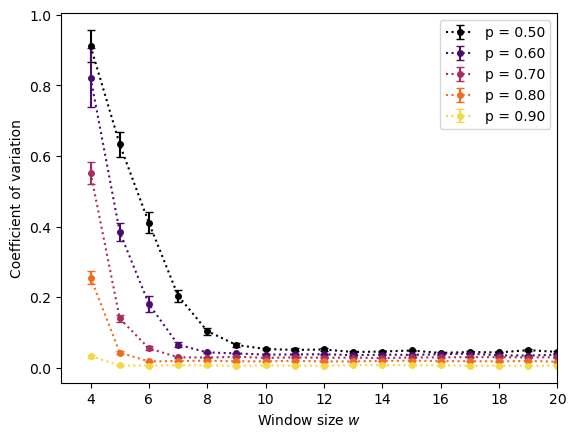

In [7]:
imp.reload(sim)

# Parameters
n = 10
m = 3
w_vec = np.arange(3,21,1)
p_vec = np.arange(0.5,1,0.1)

# Numerical parameters
N_samples = 100
N_experiments = 10
randomseed = 2

savefig = False

# Plot
x_param = 'w'
x_array = w_vec
z_param = 'p'
z_array = p_vec

### ---------- ###
### ---------- ###

cmap = plt.colormaps['inferno']
colors = [cmap(i) for i in np.linspace(0,0.9,len(z_array))]

np.random.seed(randomseed)
random.seed(randomseed)

for idx in tqdmn(range(len(z_array)), leave='False'):
    if z_param == 'p':
        p = p_vec[idx]
    elif z_param == 'm':
        m = m_vec[idx]
    elif z_param == 'w':
        w = w_vec[idx]
    x_array_plot = []
    C2_vec = []
    C2_vec_stderr = []
    for x in x_array:
        if x_param == 'p':
            p = x
        elif x_param == 'm':
            m = x
        elif x_param == 'w':
            w = x
        if w*m < n:
            continue

        x_array_plot += [x]
        _C2_exp = []
        for N_exp in range(N_experiments):
            avg, std, stderr = sim.simulate_multiplexed_window_problem(n, m, w, p, N_samples, None)
            _C2_exp += [std**2/avg**2]
        C2_vec += [np.mean(_C2_exp)]
        C2_vec_stderr += [np.std(_C2_exp)/np.sqrt(N_experiments)]

    plt.errorbar(x_array_plot, C2_vec, yerr=C2_vec_stderr,
                 marker='o', markersize=4, linestyle=':', capsize=3,
                 color=colors[idx], label='p = %.2f'%p)

# PLOT SPECS
if x_param == 'p':
    x_label = r'Prob. successful delivery $p$'
elif x_param == 'm':
    x_label = r'Attempts per batch $m$'
elif x_param == 'w':
    x_label = r'Window size $w$'
plt.xlabel(x_label)
plt.ylabel(r'Coefficient of variation')
plt.xlim(w_vec[0],w_vec[-1])
plt.legend()

# SAVE
if savefig:
    filename = 'figs/PAPER-Cwindow2'
    if not n in [x_param, z_param]:
        filename += '-n%d'%n
    if not w in [x_param, z_param]:
        filename += '-w%d'%w
    if not p in [x_param, z_param]:
        filename += '-p%.3f'%p
    if not m in [x_param, z_param]:
        filename += '-m%d'%m
    filename += '_Nsamples%d_Nexp%d_randseed%d.pdf'%(N_samples, N_experiments, randomseed)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]

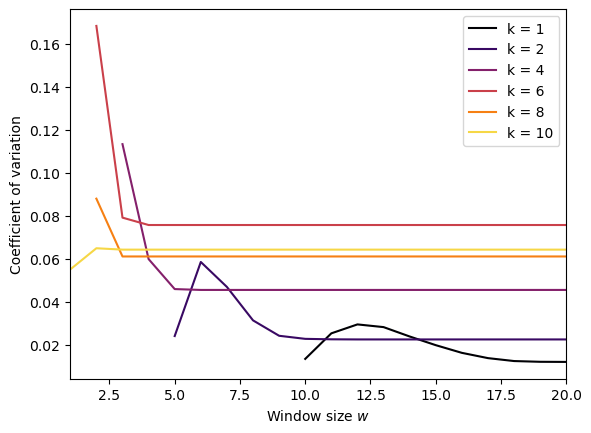

In [8]:
imp.reload(sim)

# Parameters
n = 10
k_vec = [1]+list(np.arange(2,11,2))
w_vec = np.arange(1,21,1)
p = 0.75

# Numerical parameters
N_samples = 10000
randomseed = 2

### ---------- ###
### ---------- ###

cmap = plt.colormaps['inferno']
colors = [cmap(i) for i in np.linspace(0,0.9,len(k_vec))]

for idx in tqdmn(range(len(k_vec)), leave='False'):
    k = k_vec[idx]
    w_vec_plot = []
    C_vec = []
    for w in w_vec:
        if w*k < n:
            continue
        avg, std, stderr = sim.simulate_multiplexed_window_problem(n, k, w, p, N_samples, randomseed)
        w_vec_plot += [w]
        C_vec += [std/avg**2]

    plt.plot(w_vec_plot, C_vec, color=colors[idx], label='k = %d'%k)

plt.xlabel(r'Window size $w$')
plt.ylabel(r'Coefficient of variation')
plt.xlim(w_vec[0],w_vec[-1])
plt.legend()
plt.show()

  0%|          | 0/20 [00:00<?, ?it/s]

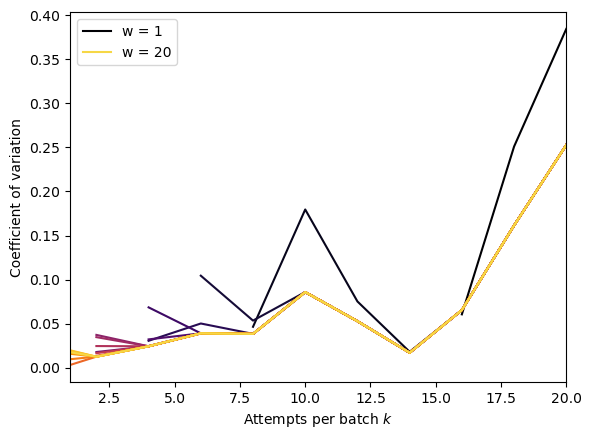

In [9]:
imp.reload(sim)

# Parameters
n = 15
k_vec = [1]+list(np.arange(2,21,2))
w_vec = np.arange(1,21,1)
p = 0.75

# Numerical parameters
N_samples = 10000
randomseed = 2

### ---------- ###
### ---------- ###

cmap = plt.colormaps['inferno']
colors = [cmap(i) for i in np.linspace(0,0.9,len(w_vec))]

for idx in tqdmn(range(len(w_vec)), leave='False'):
    w = w_vec[idx]
    k_vec_plot = []
    C_vec = []
    for k in k_vec:
        if w*k < n:
            continue
        avg, std, stderr = sim.simulate_multiplexed_window_problem(n, k, w, p, N_samples, randomseed)
        k_vec_plot += [k]
        C_vec += [std/avg**2]

    if w==w_vec[0] or w==w_vec[-1]:
        labelw = 'w = %d'%w
    else:
        labelw = ''

    plt.plot(k_vec_plot, C_vec, color=colors[idx], label=labelw)

plt.xlabel(r'Attempts per batch $k$')
plt.ylabel(r'Coefficient of variation')
plt.xlim(w_vec[0],w_vec[-1])
plt.legend()
plt.show()

&nbsp;
</br>
&nbsp;
</br>
&nbsp;
</br>


## Coefficient of variation of the service time

It can be shown that the coefficient of variation of the service time is larger than the coefficient of variation of the window problem. Here we test a small numerical example:

In [20]:
E_B = 20 # Expected value of number of batches until success
E_B2 = 450 # Expected value of squared number of batches until success
assert E_B2 >= E_B**2, 'Invalid parameters'

x = 44 # In our model, x=2L/c
y = 13 # In our model, y=t_fwd0*(2N+1)

# ----------------------
C_w2 = E_B2/E_B**2 - 1

E_Ts = x + y*E_B
E_Ts2 = x**2 + 2*x*y*E_B + y**2*E_B2

C_s2 = E_Ts2/E_Ts**2 - 1

print('Sq. Coeff. Var. (window):  %.3f'%C_w2)
print('Sq. Coeff. Var. (service): %.3f'%C_s2)

assert C_s2 <= C_w2

Sq. Coeff. Var. (window):  0.125
Sq. Coeff. Var. (service): 0.091
